In [42]:
!ls
!rm -rf *
# %cd /kaggle/working/


/kaggle/working


In [43]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [44]:
!pip install -U ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6407.4/8062.4 GB disk)


In [45]:
from ultralytics import YOLO

from IPython.display import display, Image

# 1. Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [46]:
# Run inference on an image with YOLO11n
# !yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

%cd {HOME}
!yolo predict mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
Ultralytics 8.3.202 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /kaggle/working/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 53.7ms
Speed: 3.1ms preprocess, 53.7ms inference, 146.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /kaggle/working/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


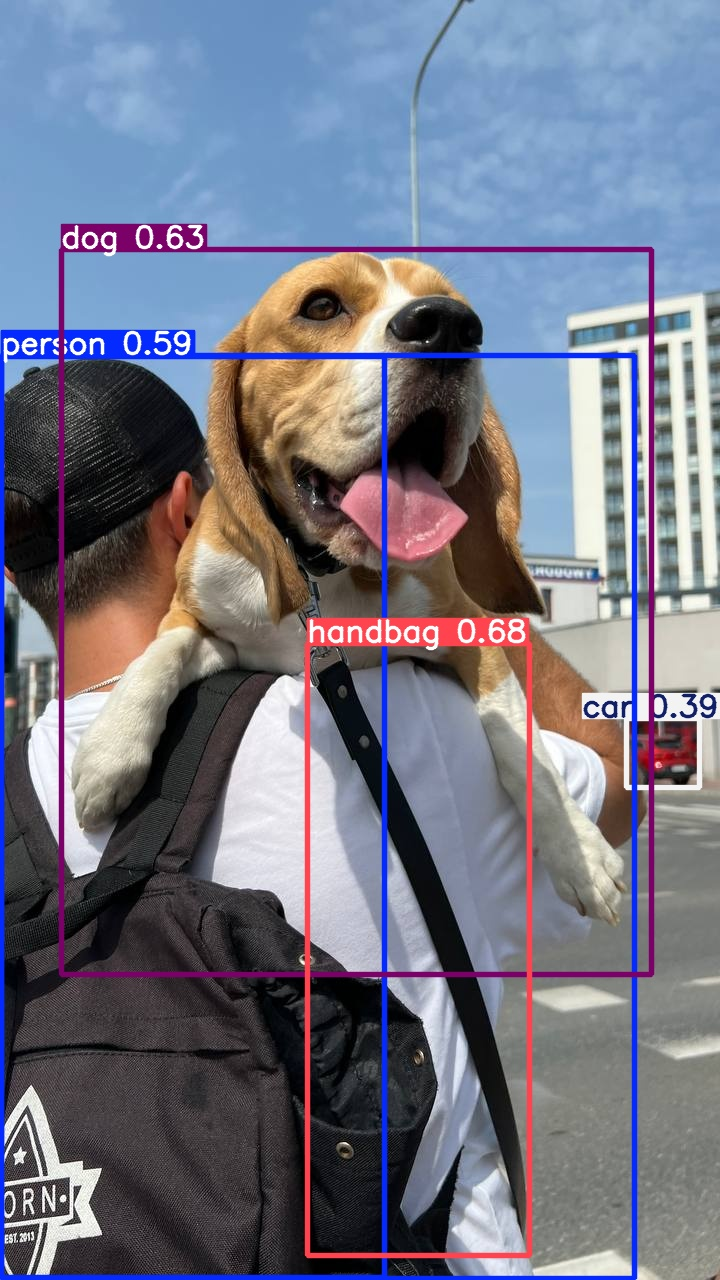

In [47]:
%cd {HOME}
# Image('runs/detect/predict/dog.jpeg')
Image(filename='runs/detect/predict/dog.jpg', height=600)

In [49]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="n12mRmQdWmrjCSKFgJMC")
project = rf.workspace("waste-detections-by-fu").project("waste-detections-c0mkz")
version = project.version(6)
dataset = version.download("yolov11")

/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-Detections-6 in yolov11:: 100%|██████████| 14224/14224 [00:02<00:00, 5474.83it/s]


In [50]:
dataset.location

'/kaggle/working/datasets/Waste-Detections-6'

In [ ]:
# Train YOLO11n
%cd {HOME}

!yolo train model=yolo11n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True device=0,1

In [52]:
!ls {HOME}/runs/detect/train/

BoxF1_curve.png					   train_batch1.jpg
BoxPR_curve.png					   train_batch16000.jpg
BoxP_curve.png					   train_batch16001.jpg
BoxR_curve.png					   train_batch16002.jpg
args.yaml					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1758394273.7e81a772a675.341.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
results.csv					   val_batch2_labels.jpg
results.png					   val_batch2_pred.jpg
train_batch0.jpg				   weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [56]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.202 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2084.8±683.9 MB/s, size: 87.4 KB)
val: Scanning /kaggle/working/datasets/Waste-Detections-6/valid/labels.cache... 427 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 427/427 8.4Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 5.6it/s 4.8s0.1s
                   all        427       1050      0.689      0.619      0.674      0.543
                 Paper        151        275      0.724      0.622      0.715      0.597
        Plastic Bottle        134        276      0.753       0.75      0.791      0.676
           Plastic bag         98        165      0.638      0.606      0.652      0.503
         Plastic waste        144        334       0.64      0.497      0.536      0.397
Spee

In [4]:
# Validate YOLO11n on COCO8 val
# !yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.202 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

WARNING ⚠️ Dataset 'coco8.yaml' images not found, missing path '/kaggle/working/datasets/coco8/images/val'
Unzipping /kaggle/working/datasets/coco8.zip to /kaggle/working/datasets/coco8...: 100% ━━━━━━━━━━━━ 25/25 4.9Kfiles/s 0.0s
Dataset download success ✅ (0.3s), saved to /kaggle/working/datasets

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1421.3±217.3 MB/s, size: 54.0 KB)
val: Scanning /kaggle/working/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 250.1it/s 0.0s
val: New cache created: /kaggle/working/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 0.6it/s 1.7s
                   all          4         17       0.57       0.85      0.847      0.632
                person          3   

# 4. Export

Export a YOLO model to any supported format below with the `format` argument, i.e. `format=onnx`. See [Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format | `format` Argument | Model | Metadata | Arguments |
|--------|-----------------|-------|----------|------------|
| [PyTorch](https://pytorch.org/) | - | `yolo11n.pt` | ✅ | - |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript) | `torchscript` | `yolo11n.torchscript` | ✅ | `imgsz`, `batch`, `dynamic`, `optimize`, `half`, `nms`, `device` |
| [ONNX](https://docs.ultralytics.com/integrations/onnx) | `onnx` | `yolo11n.onnx` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `opset`, `simplify`, `nms`, `device` |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino) | `openvino` | `yolo11n_openvino_model/` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt) | `engine` | `yolo11n.engine` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `simplify`, `nms`, `fraction`, `device`, `data`, `workspace` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml) | `coreml` | `yolo11n.mlpackage` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model` | `yolo11n_saved_model/` | ✅ | `imgsz`, `batch`, `int8`, `keras`, `nms`, `device` |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef) | `pb` | `yolo11n.pb` | ❌ | `imgsz`, `batch`, `device` |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite) | `tflite` | `yolo11n.tflite` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu) | `edgetpu` | `yolo11n_edgetpu.tflite` | ✅ | `imgsz`, `device` |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs) | `tfjs` | `yolo11n_web_model/` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle) | `paddle` | `yolo11n_paddle_model/` | ✅ | `imgsz`, `batch`, `device` |
| [MNN](https://docs.ultralytics.com/integrations/mnn) | `mnn` | `yolo11n.mnn` | ✅ | `imgsz`, `batch`, `half`, `int8`, `device` |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn) | `ncnn` | `yolo11n_ncnn_model/` | ✅ | `imgsz`, `batch`, `half`, `device` |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500) | `imx` | `yolo11n_imx_model/` | ✅ | `imgsz`, `int8`, `fraction`, `device`, `data` |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn) | `rknn` | `yolo11n_rknn_model/` | ✅ | `imgsz`, `batch`, `name`, `device` |

In [58]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=torchscript

Ultralytics 8.3.202 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.2 MB)

TorchScript: starting export with torch 2.4.0...
TorchScript: export success ✅ 2.7s, saved as '/kaggle/working/runs/detect/train/weights/best.torchscript' (10.3 MB)

Export complete (3.2s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best.torchscript imgsz=640 data=/kaggle/working/datasets/Waste-Detections-6/data.yam

In [62]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics 8.3.202 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141402_jpg.rf.eca6609b65e2645932230f9186be83f4.jpg: 640x640 9 Plastic Bottles, 11.1ms
image 2/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141446_jpg.rf.fff8ddd58bfa68db3ad17b97c8d21949.jpg: 640x640 6 Plastic wastes, 8.6ms
image 3/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141649_jpg.rf.30d1a279399f53b8d35f8567c01d9874.jpg: 640x640 6 Plastic wastes, 8.2ms
image 4/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141652_jpg.rf.f9c3ff2eb28a69c88222dc0a89e4a0ac.jpg: 640x640 3 Plastic wastes, 7.9ms
image 5/283 /kaggle/working/datasets/Waste-Detections-6/test/images/20250303_141654_jpg.rf.0a76417ecdcfc7ae4fffb7fa0cdb3d21.jpg: 640x640 4 Plastic wastes, 8.1ms
image 6/283 /kag

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
! zip -r yolov11n_recyclablewaste.zip {HOME}/runs/